In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv
from pandas import read_csv
from myusefultools import parser
from myusefultools.green_ampt import calc_wetfront_depth

In [19]:
θs = 0.31
Ks = 2.83E-5  #m/s

kwargs_depth_wetfront= dict(
    Ks = Ks, #m/s
    h0 = 0.25, #m
    hs = -6.0, #m
    theta_s = θs, 
    theta_i = 0.04255)

In [20]:
vtk_files = parser.getVTKList("SW150/VTK", )
times_seconds = parser.getTimeList("SW150")
times_minutes = np.array([float(t)/60 for t in times_seconds])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


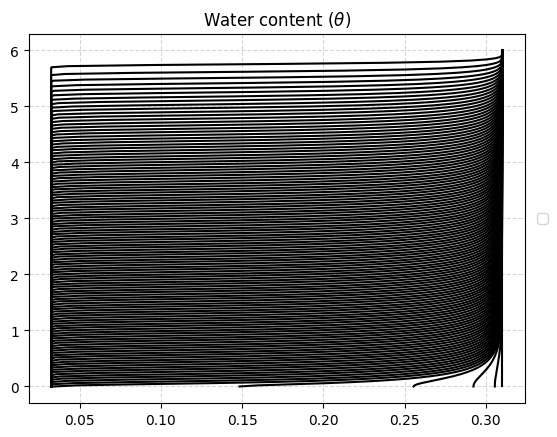

In [21]:
fig,ax = plt.subplots()

for minute, vtk in zip(times_minutes, vtk_files):

    mesh = pv.read("SW150/VTK/" + vtk)
    line = pv.Line(
    a:=[0, 0, mesh.bounds[5]],
    b:=[0, 0, mesh.bounds[2]])
    
    sample = mesh.sample_over_line(a,b)
    
    ax.plot(sample["Sw"]*0.48, sample.points[:, 2], c='k')

ax.grid(True, ls='dashed', alpha=0.5)

ax.legend(loc='center left', bbox_to_anchor=[1.01, 0.5])
ax.set_title("Water content ($\\theta$)")
plt.show()


In [22]:
minutes = np.array([float(t) for t in times_minutes])
total_mass = np.zeros_like(minutes)

for i, (minute, vtk) in enumerate(zip(minutes, vtk_files)):

    mesh = pv.read("SW150/VTK/" + vtk)
    integrated = mesh.integrate_data()
    # volume = integrated['Volume'][0] 
    total_mass[i] = integrated['Sw'][0]

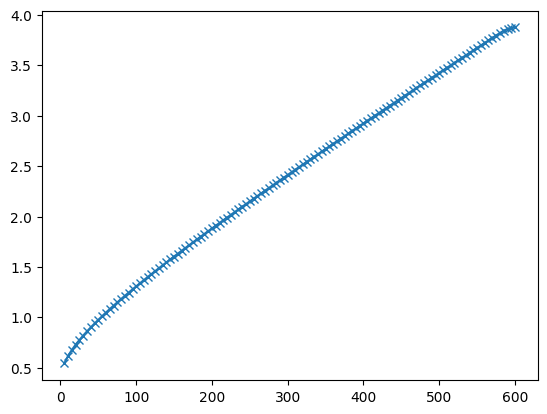

In [23]:
fig, ax = plt.subplots()
ax.plot(minutes, total_mass, marker='x')
plt.show()

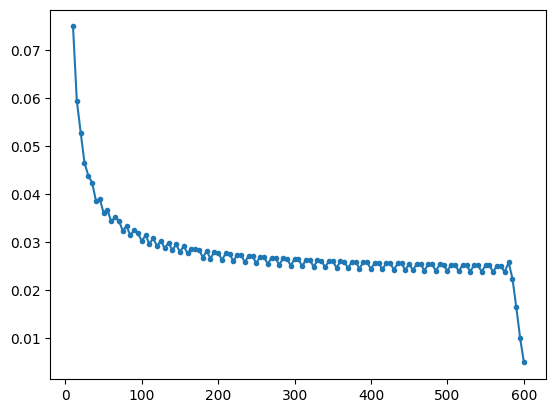

In [24]:
fig, ax = plt.subplots()
ax.plot(minutes[1:], np.diff(total_mass), marker='.')
plt.show()